Arthur: Amobichukwu Amanambu
Objective: Using Recurrent Neural Network to predict Dicharge for 90 days.
Description: the study area is Apalachicola River. the Discharge data is from Chattahoochee gauging station. Daily time stamp of data from 2015 to 2020 was collected and three months into 2021 (January to March) was used to compare the prediction of three months into 2021 as predicted by the model. The data of this work is also uploaded on GitHub.

# Import packages

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Data and transfrom to array

In [141]:
#import data
dataset_train = pd.read_csv(r"C:\Users\a.amanambu\Desktop\RNN.csv")
#dataset_train = pd.read_csv(R"C:\Users\a.amanambu\Downloads\archive\Google_Stock_Price_Train.csv")
#convert data to arrays
training_set = dataset_train.iloc[:, 1:2].values

# Rescale: range of 0-to-1

In [144]:
#Noramlise the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Normalize = scaler.fit_transform(training_set)

# Create training and testing data and make a 300 time steps from the daily

In [145]:
#Let's create a data structure with 300 timesteps and one output as an Array of training data

X_train = []
y_train = []
for i in range(300, 1857):
    X_train.append(Normalize[i-300:i, 0])
    y_train.append(Normalize[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [146]:
#what does the tike step look like
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.062104,0.032795,0.082700,0.528676,0.339354,0.185678,0.032003,0.092205,0.126267,0.066065,...,0.043885,0.031210,0.103295,0.053390,0.065272,0.078739,0.062104,0.019328,0.028834,0.048638
1,0.032795,0.082700,0.528676,0.339354,0.185678,0.032003,0.092205,0.126267,0.066065,0.027250,...,0.031210,0.103295,0.053390,0.065272,0.078739,0.062104,0.019328,0.028834,0.048638,0.115970
2,0.082700,0.528676,0.339354,0.185678,0.032003,0.092205,0.126267,0.066065,0.027250,0.026458,...,0.103295,0.053390,0.065272,0.078739,0.062104,0.019328,0.028834,0.048638,0.115970,0.103295
3,0.528676,0.339354,0.185678,0.032003,0.092205,0.126267,0.066065,0.027250,0.026458,0.046261,...,0.053390,0.065272,0.078739,0.062104,0.019328,0.028834,0.048638,0.115970,0.103295,0.068441
4,0.339354,0.185678,0.032003,0.092205,0.126267,0.066065,0.027250,0.026458,0.046261,0.099335,...,0.065272,0.078739,0.062104,0.019328,0.028834,0.048638,0.115970,0.103295,0.068441,0.059728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,0.241128,0.277567,0.187262,0.175380,0.221324,0.288657,0.292617,0.333016,0.492237,0.393219,...,0.210234,0.088245,0.113593,0.073194,0.248257,0.496990,0.317966,0.427281,0.342522,0.104880
1553,0.277567,0.187262,0.175380,0.221324,0.288657,0.292617,0.333016,0.492237,0.393219,0.473226,...,0.088245,0.113593,0.073194,0.248257,0.496990,0.317966,0.427281,0.342522,0.104880,0.130228
1554,0.187262,0.175380,0.221324,0.288657,0.292617,0.333016,0.492237,0.393219,0.473226,0.401141,...,0.113593,0.073194,0.248257,0.496990,0.317966,0.427281,0.342522,0.104880,0.130228,0.192807
1555,0.175380,0.221324,0.288657,0.292617,0.333016,0.492237,0.393219,0.473226,0.401141,0.527883,...,0.073194,0.248257,0.496990,0.317966,0.427281,0.342522,0.104880,0.130228,0.192807,0.200729


# reshape the training data for use in the model

In [162]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Import needed libraraies for building the LSTM Recurrent Neural Network

In [163]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout

# create four network and an outer layer while training the data

In [164]:
#Jump start the model

Model = Sequential()

#Add the initial layer with Dropout regularisation
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
Model.add(Dropout(rate =0.2))

#Add the initial layer with Dropout regularisation
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(rate =0.2))

#Add the 3rd Network with Dropout regularisation
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(rate =0.2))

#Add the 4th Network with Dropout regularisation
Model.add(LSTM(units = 100))
Model.add(Dropout(rate =0.2))

# Add an outer Layer
Model.add(Dense(units = 1))
                         

# Compile the Network

In [165]:
#compile the netwrok

Model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model

In [166]:
#Use the training data to fit the LSTM RNN Model

Model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
25/25 [==============================] - 48s 2s/step - loss: 0.0212
Epoch 2/100
25/25 [==============================] - 47s 2s/step - loss: 0.0143
Epoch 3/100
25/25 [==============================] - 49s 2s/step - loss: 0.0137
Epoch 4/100
25/25 [==============================] - 50s 2s/step - loss: 0.0134
Epoch 5/100
25/25 [==============================] - 50s 2s/step - loss: 0.0135
Epoch 6/100
25/25 [==============================] - 48s 2s/step - loss: 0.0129
Epoch 7/100
25/25 [==============================] - 48s 2s/step - loss: 0.0119
Epoch 8/100
25/25 [==============================] - 47s 2s/step - loss: 0.0121
Epoch 9/100
25/25 [==============================] - 48s 2s/step - loss: 0.0117
Epoch 10/100
25/25 [==============================] - 47s 2s/step - loss: 0.0113
Epoch 11/100
25/25 [==============================] - 48s 2s/step - loss: 0.0115
Epoch 12/100
25/25 [==============================] - 48s 2s/step - loss: 0.0117
Epoch 13/100
25/25 [=================

# Import testing data to prdict future time step

In [167]:
dataset_test = pd.read_csv(r"C:\Users\a.amanambu\Desktop\Testing.csv")

In [168]:
testing_set = dataset_test.iloc[:, 1:2].values

# Process and transfome data to fit the modelled data

In [169]:
#import from sklearn to tranform data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#merge all dataset
all_dataset = pd.concat((dataset_train['Discharge'], dataset_test['Discharge']), axis = 0)

#get the remaining dataset
discharge_timestep = all_dataset[len(all_dataset) - len(dataset_test) - 300:].values #prepare the time steps
discharge_timestep = discharge_timestep.reshape(-1, 1) #transform data
discharge_timestep = sc.fit_transform(discharge_timestep) #fit the data

# Concatenate test data for next 90 days

In [170]:
# create a time step for the testing data
X_test = []
for i in range(300, 390):
    X_test.append(discharge_timestep[i-300:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
prediction_discharge = Model.predict(X_test)

prediction = sc.inverse_transform(prediction_discharge) # retrsnform the data to match

# Make a plot to compare the next 90 days

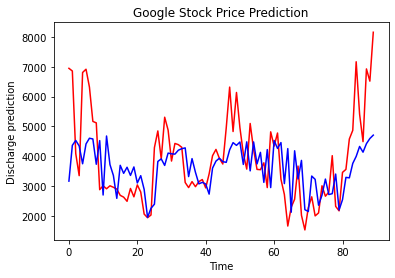

In [171]:
plt.plot(testing_set, color = 'red', label = 'Discharge data')
plt.plot(prediction, color = 'blue', label = 'Predicted Discharge Data')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Discharge prediction')
plt.show()